# Fitting Dynamical Models to Data
This notebook demonstrates how to fit a simple dynamical model, a harmonic oscillator, to data with measurement uncertainty.

In [2]:
# numerical tools
import numpy as np
# plotting
import matplotlib.pyplot as plt
# data(base) tools
import pandas as pd
# model fitting
from scipy.optimize import curve_fit

In [7]:
# Step 1: read and plot the data
data = pd.read_csv('data.csv')

In [8]:
data

,time_s,signal_m
0,0.00000,0.529097
1,0.10101,0.631935
2,0.20202,0.850601
3,0.30303,1.046243
4,0.40404,0.942273
...,...,...
95,9.59596,0.599867
96,9.69697,0.894227
97,9.79798,0.973950
98,9.89899,0.993033


In [9]:
# Step 2: Define the dynamical model: simple harmonic oscillator
# The model is fixed. What we try to do is fit the model parameters A, omega, phi and C

def harmonic_oscillator(t, A, omega, phi, C):
    """ Dynamical model for a harmonic oscillator
    # A     ... amplitude
    # omega ... angular frequency
    # phi   ... phase
    # C     ... offset 
    """
    
    model = A * np.sin(omega * t + phi) + C
    return model

In [10]:
# Step 3: provide initial guesses for the parameters A, omega, phi, C
initial_guess = [1.0, 2.0, 0.0, 0.0]  # 


Fitted parameters: A = 1.0129658797000514, omega = 1.9949971017602945, phi = 0.5409518432595922, C = -0.009923100726391755


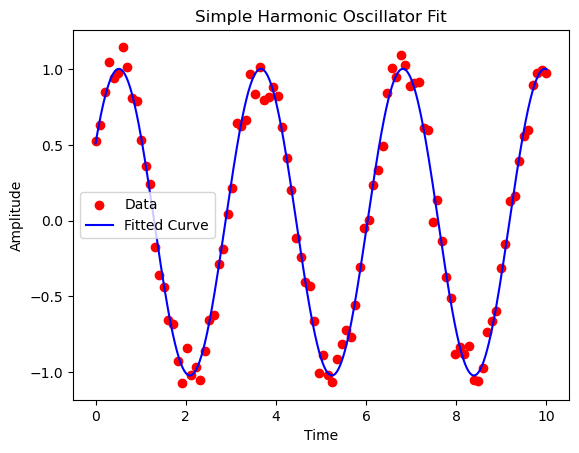

In [1]:
# Step 4: Use curve_fit to fit the harmonic oscillator model to the data
t_data = data.time_s.values
y_data = data.signal_m.values
params, params_covariance = curve_fit(harmonic_oscillator, t_data, y_data, p0=initial_guess)




In [ ]:
# Extract the fitted parameters
A_fit, omega_fit, phi_fit, C_fit = params

# Print fitted parameters
print(f"Fitted parameters: A = {A_fit}, omega = {omega_fit}, phi = {phi_fit}, C = {C_fit}")



In [ ]:
# Plot the original data and the fitted curve
plt.scatter(t_data, y_data, label='Data', color='red')
t_fit = np.linspace(0, 10, 1000)
y_fit = harmonic_oscillator(t_fit, A_fit, omega_fit, phi_fit, C_fit)
plt.plot(t_fit, y_fit, label='Fitted Curve', color='blue')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [m]')
plt.title('Simple Harmonic Oscillator Fit')
plt.show()


## Here is how the synthetic data was generated (for example purposes)

In [3]:
# Initiate a random seed for the random number generator. That will allow us to reproduce the results.
np.random.seed(42)

t_data = np.linspace(0, 10, 100)  # Time data
A_true, omega_true, phi_true, C_true = 1.0, 2.0, 0.5, 0.0  # True parameters
y_data = A_true * np.sin(omega_true * t_data + phi_true) + C_true # True signal

y_data += 0.1 * np.random.normal(size=t_data.size)  # Add noise to data



In [4]:
# Create a dataframe to export the data

dataframe = pd.DataFrame()
dataframe['time_s'] = t_data
dataframe['signal_m'] = y_data

In [5]:
dataframe

,time_s,signal_m
0,0.00000,0.529097
1,0.10101,0.631935
2,0.20202,0.850601
3,0.30303,1.046243
4,0.40404,0.942273
...,...,...
95,9.59596,0.599867
96,9.69697,0.894227
97,9.79798,0.973950
98,9.89899,0.993033


In [6]:
# export the data into "data.csv"
dataframe.to_csv('data.csv',index=False)